<a href="https://colab.research.google.com/github/majiddaeinejad/quera-ai-bootcamp-divar/blob/statistical_analysis/Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setup** cell

In [1]:
!pip install arabic-reshaper python-bidi jdatetime utm --quiet

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import arabic_reshaper
from bidi.algorithm import get_display
import jdatetime

import geopandas as gpd
from shapely.geometry import Polygon
import folium
from branca.colormap import StepColormap


rcParams['font.family'] = 'DejaVu Sans'

def fa_label(text):
    return get_display(arabic_reshaper.reshape(text))



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 6.9 MB/s eta 0:00:00


Load data and exploring


In [2]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)


file_path = '/content/drive/MyDrive/Colab Notebooks/Divar.csv'


df = pd.read_csv(file_path , encoding='utf-8')



Mounted at /content/drive


/tmp/ipython-input-2395098001.py:9: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path , encoding='utf-8')


In [3]:
df.head()

,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,...,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,Unnamed: 0,rent_value,price_value,credit_value,transformable_credit,transformed_credit,transformable_rent,transformed_rent,land_size,building_size,regular_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
count,1000000.000000,3.513220e+05,5.683460e+05,3.520950e+05,3.520850e+05,7.240900e+04,3.512480e+05,7.240900e+04,1.863960e+05,9.803940e+05,29870.000000,1.024100e+04,1.806800e+04,1.046300e+04,1.355100e+04,655608.000000,655608.000000,339699.000000
mean,499999.500000,4.102299e+10,1.736537e+10,4.872084e+10,4.872222e+10,8.557025e+09,4.103164e+10,1.619934e+07,4.165480e+03,4.440648e+03,6.557650,1.209785e+10,1.389016e+11,2.355548e+10,3.156551e+10,34.982108,51.629743,465.149147
std,288675.278933,3.807534e+12,5.878739e+11,4.341346e+12,4.341407e+12,2.064576e+12,3.807935e+12,5.217890e+07,1.218927e+05,1.367118e+05,7.698655,1.103482e+12,7.042335e+12,1.542049e+12,2.434942e+12,2.379169,3.160920,125.896250
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,23.626478,40.162369,0.000000
25%,249999.750000,1.111110e+05,1.400000e+09,1.000000e+08,1.000000e+08,2.000000e+08,1.111110e+05,1.000000e+06,1.100000e+02,7.500000e+01,3.000000,5.000000e+04,4.000000e+05,6.000000e+05,5.500000e+05,34.553551,50.677175,500.000000
50%,499999.500000,5.000000e+06,2.840000e+09,2.500000e+08,2.500000e+08,4.000000e+08,5.000000e+06,6.000000e+06,1.950000e+02,1.030000e+02,4.000000,1.000000e+05,8.000000e+05,1.200000e+06,1.100000e+06,35.723312,51.345791,500.000000
75%,749999.250000,1.200000e+07,5.900000e+09,5.000000e+08,5.000000e+08,8.500000e+08,1.200000e+07,1.500000e+07,2.800000e+02,1.650000e+02,7.000000,2.000000e+05,1.600000e+06,2.500000e+06,2.500000e+06,36.307013,51.805291,500.000000
max,999999.000000,1.000000e+15,1.000000e+14,1.000000e+15,1.000000e+15,5.555556e+14,1.000000e+15,3.000000e+09,1.000000e+07,1.000000e+07,50.000000,1.111111e+14,5.006007e+14,1.111111e+14,2.002503e+14,40.358055,74.511620,500.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 61 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1000000 non-null  int64  
 1   cat2_slug                   1000000 non-null  object 
 2   cat3_slug                   999999 non-null   object 
 3   city_slug                   999998 non-null   object 
 4   neighborhood_slug           437139 non-null   object 
 5   created_at_month            1000000 non-null  object 
 6   user_type                   288882 non-null   object 
 7   description                 1000000 non-null  object 
 8   title                       999946 non-null   object 
 9   rent_mode                   352994 non-null   object 
 10  rent_value                  351322 non-null   float64
 11  rent_to_single              19 non-null       object 
 12  rent_type                   103961 non-null   object 
 13

Missing Values

In [6]:
total_rows = len(df)

avail = df.notna().sum() / total_rows * 100
missing = df.isna().sum() / total_rows * 100

avail = avail.round(1)
missing = missing.round(1)

nan_status = pd.DataFrame()
nan_status['درصد موجود'] = avail
nan_status['درصد خالی'] = missing

nan_status = nan_status.sort_values(by='درصد موجود', ascending=False)
nan_status



,درصد موجود,درصد خالی
Unnamed: 0,100.0,0.0
cat2_slug,100.0,0.0
cat3_slug,100.0,0.0
city_slug,100.0,0.0
created_at_month,100.0,0.0
...,...,...
rent_price_on_regular_days,1.8,98.2
rent_price_at_weekends,1.4,98.6
rent_price_on_special_days,1.0,99.0
cost_per_extra_person,1.0,99.0


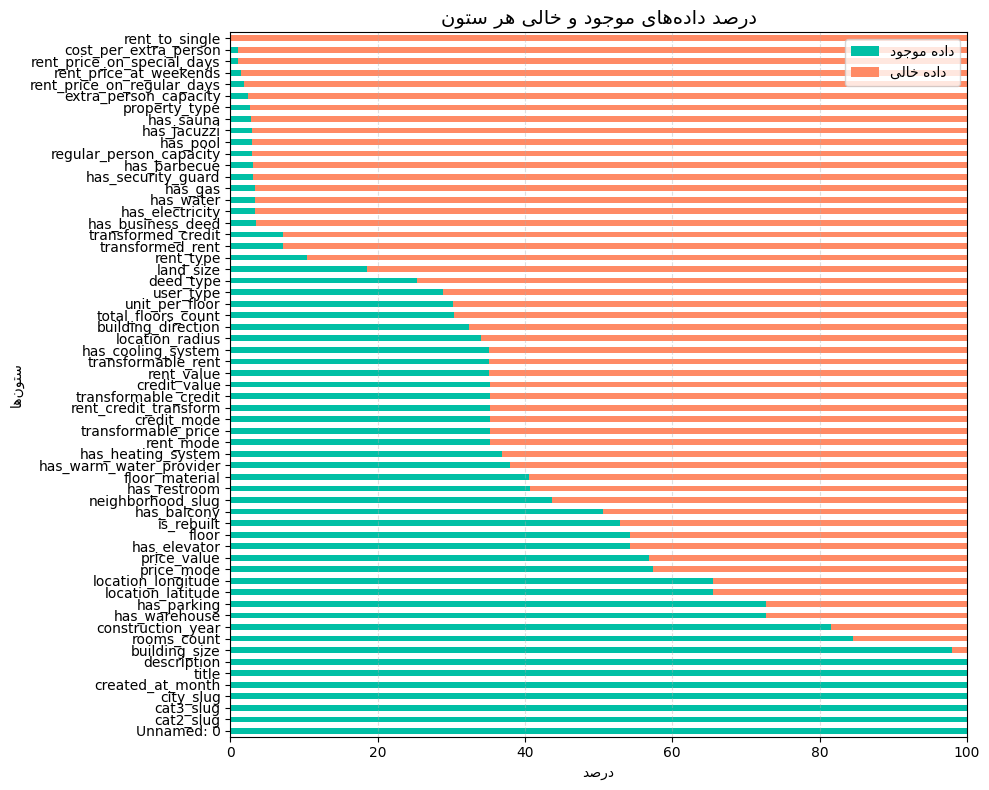

In [7]:
color_available = "#00BFA5"
color_missing = "#FF8A65"

ax = nan_status.plot(
    kind="barh",
    stacked=True,
    color=[color_available, color_missing],
    figsize=(10,8)
)

plt.xlim(0, 100)
plt.xlabel(fa_label("درصد"))
plt.ylabel(fa_label("ستون‌ها"))
plt.title(fa_label("درصد داده‌های موجود و خالی هر ستون"), fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.4)

labels = [fa_label("دادهٔ موجود"), fa_label("دادهٔ خالی")]
plt.legend(labels, title="")

plt.tight_layout()
plt.show()




	توزیع آگهی‌های موجود در دسته‌های مختلف را برای دسته‌بندی سطح دو و سطح سه رسم کنید

value counts

In [8]:
#category 2
print(df['cat2_slug'].value_counts())

#category 3
print(df['cat3_slug'].value_counts())


cat2_slug
residential-sell        558708
residential-rent        276558
commercial-rent          76567
commercial-sell          38861
temporary-rent           29903
real-estate-services     19403
Name: count, dtype: int64
cat3_slug
apartment-sell                        303385
apartment-rent                        211880
plot-old                              133570
house-villa-sell                      121753
house-villa-rent                       64678
shop-rent                              45993
shop-sell                              21855
office-rent                            21418
suite-apartment                        16465
presell                                15781
villa                                  12899
industry-agriculture-business-sell     11851
industry-agriculture-business-rent      9155
office-sell                             5155
partnership                             3622
workspace                                539
Name: count, dtype: int64


cat 2

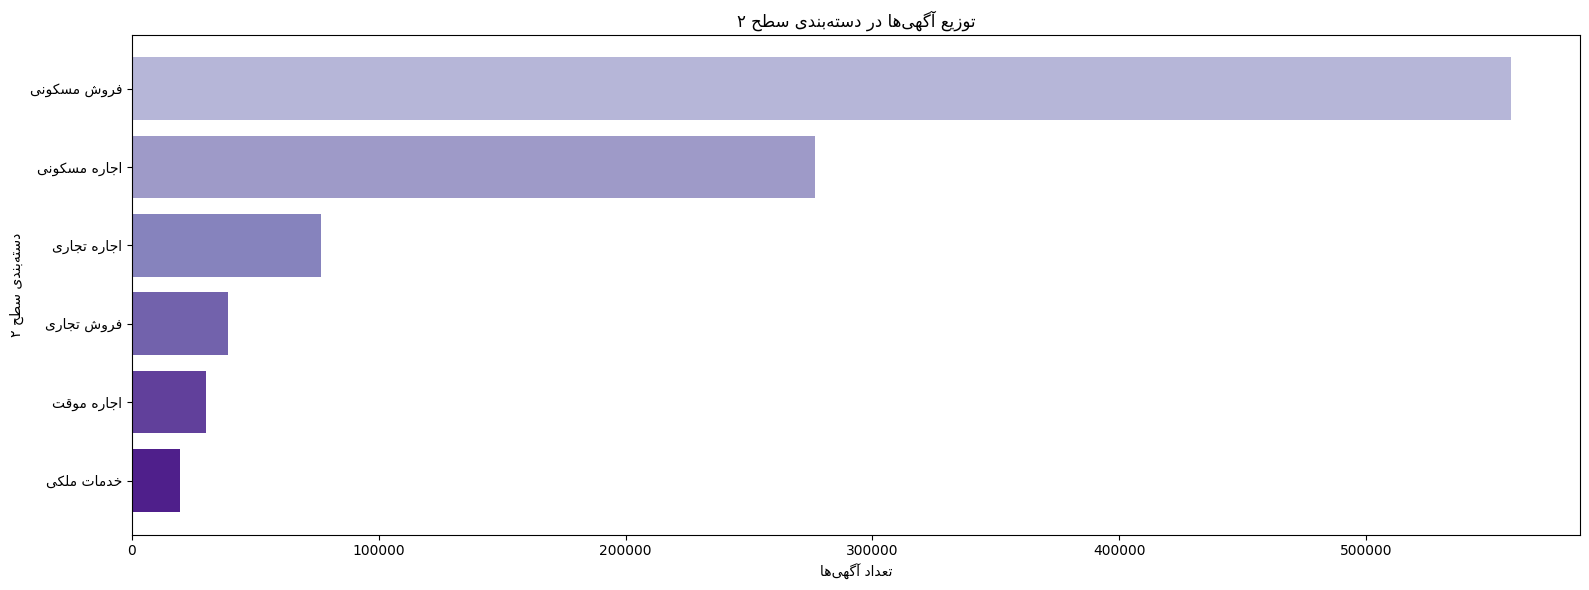

In [9]:
cat2_labels = {
    "residential-sell": "فروش مسکونی",
    "residential-rent": "اجاره مسکونی",
    "commercial-rent": "اجاره تجاری",
    "commercial-sell": "فروش تجاری",
    "temporary-rent": "اجاره موقت",
    "real-estate-services": "خدمات ملکی"
}


cat2_counts = df['cat2_slug'].value_counts()


colors = plt.cm.Purples(np.linspace(0.4, 0.9, len(cat2_counts)))


plt.figure(figsize=(16, 6))
bars = plt.barh(
    [fa_label(cat2_labels.get(idx, idx)) for idx in cat2_counts.index],
    cat2_counts.values,
    color=colors
)


plt.xlabel(fa_label("تعداد آگهی‌ها"))
plt.ylabel(fa_label("دسته‌بندی سطح ۲"))
plt.title(fa_label("توزیع آگهی‌ها در دسته‌بندی سطح ۲"))
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


cat 3

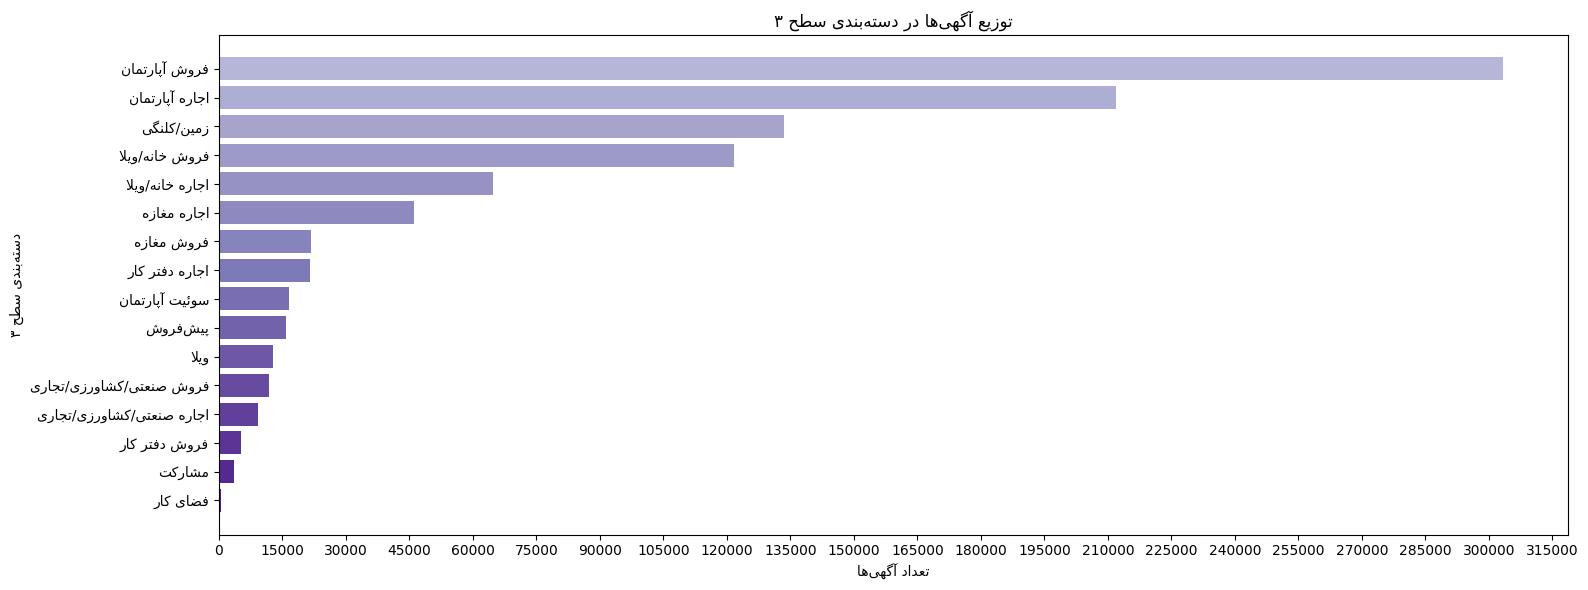

In [10]:
import matplotlib.ticker as ticker

cat3_labels = {
    "apartment-sell": "فروش آپارتمان",
    "apartment-rent": "اجاره آپارتمان",
    "plot-old": "زمین/کلنگی",
    "house-villa-sell": "فروش خانه/ویلا",
    "house-villa-rent": "اجاره خانه/ویلا",
    "shop-rent": "اجاره مغازه",
    "shop-sell": "فروش مغازه",
    "office-rent": "اجاره دفتر کار",
    "suite-apartment": "سوئیت آپارتمان",
    "presell": "پیش‌فروش",
    "villa": "ویلا",
    "industry-agriculture-business-sell": "فروش صنعتی/کشاورزی/تجاری",
    "industry-agriculture-business-rent": "اجاره صنعتی/کشاورزی/تجاری",
    "office-sell": "فروش دفتر کار",
    "partnership": "مشارکت",
    "workspace": "فضای کار"
}

cat3_counts = df['cat3_slug'].value_counts()
colors = plt.cm.Purples(np.linspace(0.4, 0.9, len(cat3_counts)))

plt.figure(figsize=(16, 6))
plt.barh(
    [fa_label(cat3_labels.get(i, i)) for i in cat3_counts.index],
    cat3_counts.values,
    color=colors
)

plt.xlabel(fa_label("تعداد آگهی‌ها"))
plt.ylabel(fa_label("دسته‌بندی سطح ۳"))
plt.title(fa_label("توزیع آگهی‌ها در دسته‌بندی سطح ۳"))
plt.gca().invert_yaxis()


ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(15000))

plt.tight_layout()
plt.show()
